In [100]:
from dolfin import *
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

First we need to define the mesh

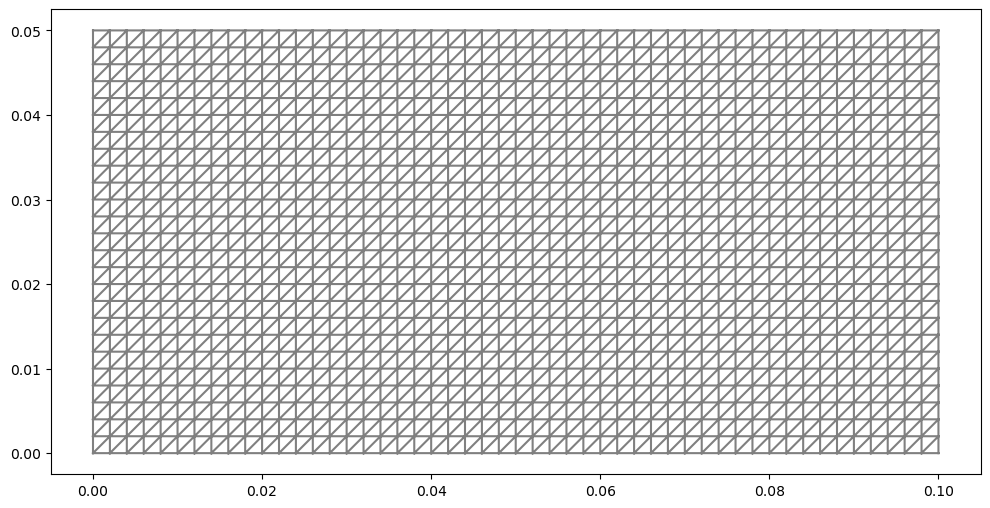

In [101]:
lx, ly = 0.1, 0.05
nx, ny = 50, 25

mesh = RectangleMesh(Point(0,0),Point(lx,ly), nx, ny)
plot(mesh)

In [102]:
rho = 8.02*10**3 #kg/m3
k = 16.26 #W/mC
cp = 502 #J/kgC
alfa = k/(cp*rho)

 Function Space and Test Functions can be defined

In [103]:
V = FunctionSpace(mesh, 'CG',1)
u = TrialFunction(V)
v = TestFunction(V)

Now we can define boundaries

In [104]:
# Define Dirichlet boundary (x = 0)
def left(x):
    return x[0] < DOLFIN_EPS 

# Define Dirichlet boundary (x = 1)
def right(x):
    return x[0] > lx - DOLFIN_EPS 

# Define Dirichlet boundary (y = 0)
def bottom(x):
    return x[1] < DOLFIN_EPS 

# Define Dirichlet boundary (y = 1)
def top(x):
    return x[1] > ly - DOLFIN_EPS 


In [105]:
T_L = 1000.00 # C Constant 1000C supply from left
T_R = 500.00 # C Constant 500C right
T_U = 1000.00 # C Top side temperature
T_B = 500.00 # C Bottom side temp
T_0 = 30.00 # C Ambient Temperature

In [106]:
bc_left   = DirichletBC(V, T_L, left)
bc_right  = DirichletBC(V, T_R, right)
bc_top    = DirichletBC(V, T_U, top)
bc_bottom = DirichletBC(V, T_B, bottom)

In [107]:
bcs = [bc_left, bc_right, bc_top, bc_bottom ]
# for bc in bcs:
#     bc.apply(u.vector())
# plot(u)

In [108]:
class InitialCondition(Expression):
    def eval(self, x):
        if x[0]>0 and x[0]<lx and x[1]>0 and x[1]<ly:
            value[0] = T_0

In [109]:
f = Constant(0)

a = inner(grad(u), grad(v))*dx
L = f*v*dx

In [110]:
u = Function(V)
solve(a==L, u, bcs)

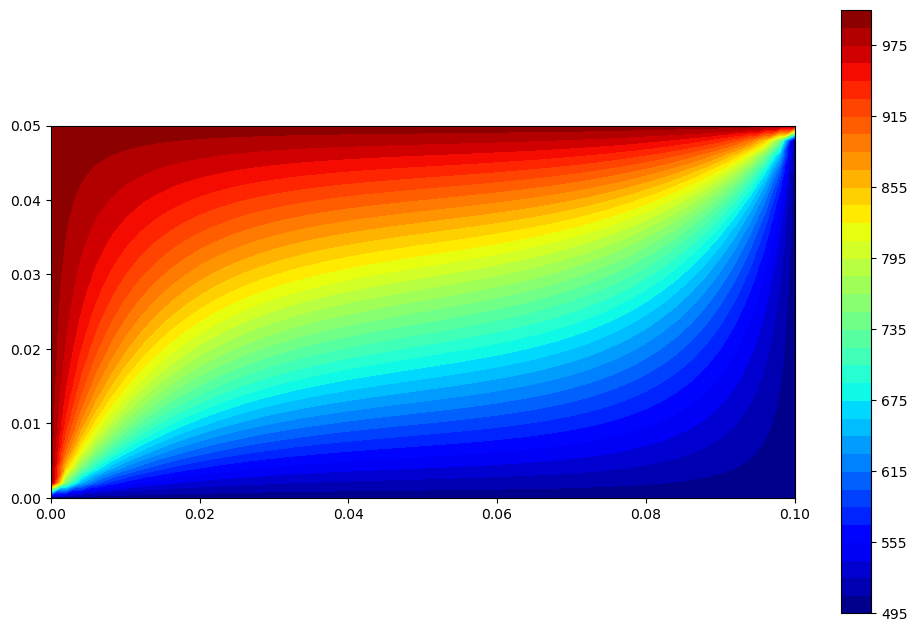

In [111]:
p = plot(u, cmap='jet')
plt.colorbar(p)